In [9]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random

In [11]:
imgs_path = os.path.join("data", "images")
labels_path = os.path.join("data", "images", "labels.csv")
print(imgs_path)
print(labels_path)

data\images
data\images\labels.csv


In [12]:
df = pd.read_csv(labels_path, delimiter=',', index_col=[0])
print(df.head())

                      pth     label    relFCs
0  anger/image0000006.jpg  surprise  0.873142
1  anger/image0000060.jpg     anger  0.852311
2  anger/image0000061.jpg     anger  0.800957
3  anger/image0000066.jpg   disgust  0.843079
4  anger/image0000106.jpg     anger  0.849108


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28175 entries, 0 to 28174
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pth     28175 non-null  object 
 1   label   28175 non-null  object 
 2   relFCs  28175 non-null  float64
dtypes: float64(1), object(2)
memory usage: 880.5+ KB


In [14]:
df["label"].unique()

array(['surprise', 'anger', 'disgust', 'fear', 'sad', 'contempt',
       'neutral', 'happy'], dtype=object)

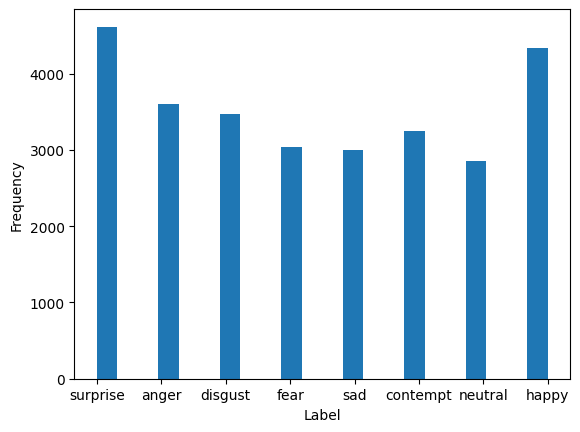

In [16]:
# Count the frequency of each item in label
# print(df['label'].value_counts())
plt.hist(df['label'], bins='auto')
plt.xlabel("Label")
plt.ylabel('Frequency')

plt.show()

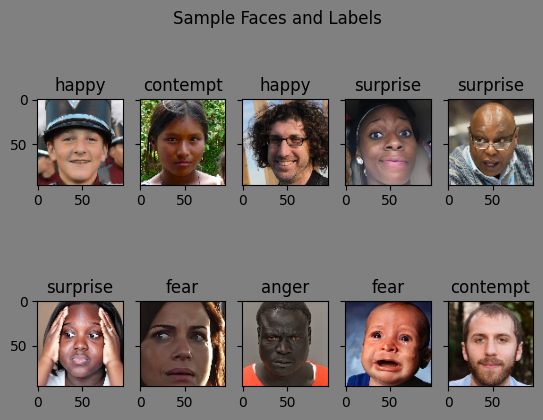

In [17]:
fig, axs = plt.subplots(2, 5, sharey=True, facecolor='gray')
fig.suptitle("Sample Faces and Labels")
axs = axs.flatten()

for i in range(10):
    idx = random.randint(0, len(df)-1)  # randomly select an index
    img_path = os.path.join(imgs_path, df['pth'][idx])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].set_title(df['label'][idx])

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from dataset import EmotionDataset
from tqdm.autonotebook import tqdm


# Calculate mean and standard deviation of each color channel in the train set
# Used to serve for data normalization when training
train_set = EmotionDataset(root="data", train=True, transform=ToTensor())

train_loader = DataLoader(train_set, batch_size=32)
mean = 0.0
std = 0.0
num_samples = train_set.__len__()

progress_bar = tqdm(train_loader, colour="green")
for images, _ in progress_bar:
    images = images.view(images.size(0), images.size(1), -1)
    mean += torch.mean(images, dim=2).sum(0)
    std += torch.std(images, dim=2).sum(0)

mean /= num_samples
std /= num_samples

print("Mean:", mean)
print("Std:", std)

C:\Users\vovuo\AppData\Local\Temp\ipykernel_13080\1294885346.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
100%|██████████| 705/705 [00:15<00:00, 46.88it/s]

Mean: tensor([0.5384, 0.4309, 0.3805])
Std: tensor([0.2563, 0.2310, 0.2234])
